<a href="https://colab.research.google.com/github/Mercymerine/ML2_notes/blob/main/earthquake_plotly_folium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium

## Getting the dataset

In [2]:
#Getting the dataset
!kaggle datasets download -d usgs/earthquake-database

Dataset URL: https://www.kaggle.com/datasets/usgs/earthquake-database
License(s): CC0-1.0
  0% 0.00/590k [00:00<?, ?B/s]
100% 590k/590k [00:00<00:00, 138MB/s]


In [3]:
#unzip the file
!unzip /content/earthquake-database.zip

Archive:  /content/earthquake-database.zip
  inflating: database.csv            


In [4]:
data = pd.read_csv('/content/database.csv')
data.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic  

[5 rows x 21 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [6]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

## Data Cleaning

In [7]:
#Creating a dtaframe with important columns
df = data[['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude', 'Magnitude Type',]]
df.head()

Date      Time  Latitude  Longitude        Type  Depth  Magnitude  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6        6.0   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0        5.8   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0        6.2   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0        5.8   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0        5.8   

  Magnitude Type  
0             MW  
1             MW  
2             MW  
3             MW  
4             MW

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            23412 non-null  object 
 1   Time            23412 non-null  object 
 2   Latitude        23412 non-null  float64
 3   Longitude       23412 non-null  float64
 4   Type            23412 non-null  object 
 5   Depth           23412 non-null  float64
 6   Magnitude       23412 non-null  float64
 7   Magnitude Type  23409 non-null  object 
dtypes: float64(4), object(4)
memory usage: 1.4+ MB


In [9]:
df.describe()

Latitude     Longitude         Depth     Magnitude
count  23412.000000  23412.000000  23412.000000  23412.000000
mean       1.679033     39.639961     70.767911      5.882531
std       30.113183    125.511959    122.651898      0.423066
min      -77.080000   -179.997000     -1.100000      5.500000
25%      -18.653000    -76.349750     14.522500      5.600000
50%       -3.568500    103.982000     33.000000      5.700000
75%       26.190750    145.026250     54.000000      6.000000
max       86.005000    179.998000    700.000000      9.100000

In [10]:
#Printin out the rows with missing values
df[df.isnull().any(axis=1)].head()

Date      Time  Latitude  Longitude        Type  Depth  Magnitude  \
6703  08/24/1983  13:36:00   40.3732  -124.9227  Earthquake  11.93       5.70   
7294  11/23/1984  18:08:00   37.4600  -118.5900  Earthquake   9.00       5.82   
7919  03/31/1986  11:55:00   37.4788  -121.6858  Earthquake   9.17       5.60   

     Magnitude Type  
6703            NaN  
7294            NaN  
7919            NaN

In [11]:
df = df.copy()
df.loc[:, 'Magnitude Type'] = df['Magnitude Type'].fillna(df['Magnitude Type'].mode()[0])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            23412 non-null  object 
 1   Time            23412 non-null  object 
 2   Latitude        23412 non-null  float64
 3   Longitude       23412 non-null  float64
 4   Type            23412 non-null  object 
 5   Depth           23412 non-null  float64
 6   Magnitude       23412 non-null  float64
 7   Magnitude Type  23412 non-null  object 
dtypes: float64(4), object(4)
memory usage: 1.4+ MB


In [13]:
## Checking for unique values in colum type and mahnitude type
df['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [14]:
df['Magnitude Type'].unique()

array(['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', 'MWB', 'MWW', 'MWR'],
      dtype=object)

Mappinng the magnitude type into a much more summarized version

MW (Moment Magnitude) → Used for most big earthquakes 🌍

ML (Richter Scale) → Common for smaller, local earthquakes 📍

MS (Surface Wave Magnitude) → Measures surface shaking 🌊

others--  refers to magnitude types that are less commonly used or not as widely recognized by the general public

In [15]:
# Define mapping dictionary
magnitude_mapping = {
    "MWC": "MW", "MWB": "MW", "MWW": "MW", "MWR": "MW", "MW": "MW",
    "ML": "ML",
    "MS": "MS",
    "MB": "Other", "MD": "Other", "MH": "Other"  # Optional: Group less common types
}

# Apply mapping
df["Magnitude Type"] = df["Magnitude Type"].replace(magnitude_mapping)


In [16]:
df["Magnitude Type"].unique()

array(['MW', 'ML', 'Other', 'MS'], dtype=object)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            23412 non-null  object 
 1   Time            23412 non-null  object 
 2   Latitude        23412 non-null  float64
 3   Longitude       23412 non-null  float64
 4   Type            23412 non-null  object 
 5   Depth           23412 non-null  float64
 6   Magnitude       23412 non-null  float64
 7   Magnitude Type  23412 non-null  object 
dtypes: float64(4), object(4)
memory usage: 1.4+ MB


In [18]:
df.head()

Date      Time  Latitude  Longitude        Type  Depth  Magnitude  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6        6.0   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0        5.8   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0        6.2   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0        5.8   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0        5.8   

  Magnitude Type  
0             MW  
1             MW  
2             MW  
3             MW  
4             MW

In [19]:
# Convertind date and time column to datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            23409 non-null  datetime64[ns]
 1   Time            23409 non-null  object        
 2   Latitude        23412 non-null  float64       
 3   Longitude       23412 non-null  float64       
 4   Type            23412 non-null  object        
 5   Depth           23412 non-null  float64       
 6   Magnitude       23412 non-null  float64       
 7   Magnitude Type  23412 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 1.4+ MB


### Adding countries to my dataset

In [21]:
#Saving my dataset
df.to_csv('earthquake_data.csv', index=False)

In [22]:
!pip install geopandas shapely

In [23]:
import geopandas as gpd
from shapely.geometry import Point

In [24]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf

Date      Time  Latitude  Longitude        Type   Depth  \
0     1965-01-02  13:44:18   19.2460   145.6160  Earthquake  131.60   
1     1965-01-04  11:29:49    1.8630   127.3520  Earthquake   80.00   
2     1965-01-05  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3     1965-01-08  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4     1965-01-09  13:32:50   11.9380   126.4270  Earthquake   15.00   
...          ...       ...       ...        ...         ...     ...   
23407 2016-12-28  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23408 2016-12-28  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23409 2016-12-28  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410 2016-12-29  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411 2016-12-30  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Magnitude Magnitude Type                   geometry  
0            6.0             MW     POINT (145.616 19.246)  
1            5.8             MW      POINT (127.352 1.863)  
2            6.2             MW   POINT (-173.972 -20.579)  
3            5.8             MW    POINT (-23.557 -59.076)  
4            5.8             MW     POINT (126.427 11.938)  
...          ...            ...                        ...  
23407        5.6             ML  POINT (-118.8941 38.3917)  
23408        5.5             ML  POINT (-118.8957 38.3777)  
23409        5.9             MW   POINT (140.4262 36.9179)  
23410        6.3             MW   POINT (118.6639 -9.0283)  
23411        5.5          Other   POINT (141.4103 37.3973)  

[23412 rows x 9 columns]

In [30]:
#unzipping the dataset
!unzip /content/110m_cultural.zip

Archive:  /content/110m_cultural.zip
  inflating: ne_110m_populated_places_simple.prj  
  inflating: ne_110m_admin_0_countries.shx  
  inflating: ne_110m_admin_0_countries_lakes.shx  
  inflating: ne_110m_admin_0_pacific_groupings.prj  
  inflating: ne_110m_admin_0_countries.shp  
 extracting: ne_110m_admin_0_countries.cpg  
 extracting: ne_110m_admin_0_countries_lakes.cpg  
  inflating: ne_110m_admin_1_states_provinces_lines.README.html  
  inflating: ne_110m_admin_0_countries_lakes.shp  
  inflating: ne_110m_admin_0_map_units.prj  
  inflating: ne_110m_admin_1_states_provinces.prj  
  inflating: ne_110m_populated_places.shx  
  inflating: ne_110m_admin_0_boundary_lines_land.dbf  
 extracting: ne_110m_admin_0_countries.VERSION.txt  
  inflating: ne_110m_admin_0_scale_rank.dbf  
 extracting: ne_110m_populated_places.cpg  
  inflating: ne_110m_populated_places_simple.README.html  
  inflating: ne_110m_populated_places.shp  
  inflating: ne_110m_admin_1_states_provinces_lakes.dbf  
  inf

In [31]:
world = gpd.read_file('/content/ne_110m_admin_0_countries.shp')
world.head()

featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL FCLASS_GR  FCLASS_IT  \
0          None          None          None      None       None   
1          None          None          None      None       None   
2  Unrecognized  Unrecognized  Unrecognized      None       None   
3          None          None          None      None       None   
4          None          None          None      None       None   

      FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0          None      None       None      None   
1          None      None       None      None   
2  Unrecognized      None       None      None   
3          None      None       None      None   
4          None      None       None      None   

                                            geometry  
0  MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...  
1  POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...  
4  MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...  

[5 rows x 169 columns]

In [32]:
gdf = gdf.set_crs("EPSG:4326")

In [33]:
import geopandas as gpd

# Assuming gdf and world are your GeoDataFrames

# Perform spatial join
merged_df = gpd.sjoin(gdf, world, how='inner', predicate='within')

# Select desired columns and rename
merged_df = merged_df[['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude', 'Magnitude Type', 'geometry', 'ADMIN']]
merged_df = merged_df.rename(columns={'ADMIN': 'Country'})

# Display the merged data
merged_df.head()

Date      Time  Latitude  Longitude        Type  Depth  Magnitude  \
6  1965-01-12  13:32:25    27.357     87.867  Earthquake   20.0        5.9   
10 1965-01-17  20:57:41    -6.807    108.988  Earthquake  227.9        5.9   
14 1965-02-02  15:56:51    37.523     73.251  Earthquake   15.0        6.0   
58 1965-02-18  04:26:37    25.011     94.186  Earthquake   55.0        5.6   
62 1965-02-23  22:11:47   -25.633    -70.679  Earthquake   35.0        7.0   

   Magnitude Type                 geometry     Country  
6              MW    POINT (87.867 27.357)       Nepal  
10             MW   POINT (108.988 -6.807)   Indonesia  
14             MW    POINT (73.251 37.523)  Tajikistan  
58             MW    POINT (94.186 25.011)       India  
62             MW  POINT (-70.679 -25.633)       Chile

In [34]:
merged_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4889 entries, 6 to 23409
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4888 non-null   datetime64[ns]
 1   Time            4888 non-null   object        
 2   Latitude        4889 non-null   float64       
 3   Longitude       4889 non-null   float64       
 4   Type            4889 non-null   object        
 5   Depth           4889 non-null   float64       
 6   Magnitude       4889 non-null   float64       
 7   Magnitude Type  4889 non-null   object        
 8   geometry        4889 non-null   geometry      
 9   Country         4889 non-null   object        
dtypes: datetime64[ns](1), float64(4), geometry(1), object(4)
memory usage: 420.1+ KB


In [35]:
#Save this dataset
merged_df.to_csv('earthquake_data_with_countries.csv', index=False)

In [36]:
merged_df.head()

Date      Time  Latitude  Longitude        Type  Depth  Magnitude  \
6  1965-01-12  13:32:25    27.357     87.867  Earthquake   20.0        5.9   
10 1965-01-17  20:57:41    -6.807    108.988  Earthquake  227.9        5.9   
14 1965-02-02  15:56:51    37.523     73.251  Earthquake   15.0        6.0   
58 1965-02-18  04:26:37    25.011     94.186  Earthquake   55.0        5.6   
62 1965-02-23  22:11:47   -25.633    -70.679  Earthquake   35.0        7.0   

   Magnitude Type                 geometry     Country  
6              MW    POINT (87.867 27.357)       Nepal  
10             MW   POINT (108.988 -6.807)   Indonesia  
14             MW    POINT (73.251 37.523)  Tajikistan  
58             MW    POINT (94.186 25.011)       India  
62             MW  POINT (-70.679 -25.633)       Chile

In [37]:
# Convert 'Date' column to datetime if it's not already
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Now you can extract year, month, and day
merged_df['year'] = merged_df['Date'].dt.year
merged_df['month'] = merged_df['Date'].dt.month
merged_df['day'] = merged_df['Date'].dt.day

In [38]:
#unique countries
countries = merged_df['Country'].unique()
countries

array(['Nepal', 'Indonesia', 'Tajikistan', 'India', 'Chile',
       'Papua New Guinea', 'Colombia', 'Mexico', 'Turkey', 'Argentina',
       'Afghanistan', 'Greece', 'Japan', 'United States of America',
       'El Salvador', 'China', 'New Zealand', 'Iran', 'Philippines',
       'Solomon Islands', 'Vanuatu', 'Bolivia', 'Ecuador', 'Myanmar',
       'Brazil', 'Canada', 'Peru', 'Pakistan', 'Russia',
       'Democratic Republic of the Congo', 'Costa Rica', 'Guatemala',
       'Mongolia', 'France', 'Bhutan', 'Nicaragua', 'North Macedonia',
       'Italy', 'Dominican Republic', 'Zambia', 'Venezuela', 'Australia',
       'Iceland', 'Ethiopia', 'South Africa', 'Bosnia and Herzegovina',
       'Kyrgyzstan', 'Uzbekistan', 'Taiwan', 'Kazakhstan', 'Romania',
       'Panama', 'Gabon', 'Thailand', 'Madagascar',
       'United Republic of Tanzania', 'Malaysia', 'Spain', 'Belgium',
       'Republic of Serbia', 'Montenegro', 'Algeria', 'Iraq', 'Honduras',
       'Albania', 'Yemen', 'Vietnam', 'Laos', 'Po

In [39]:
merged_df.describe()

Date     Latitude    Longitude        Depth  \
count                           4888  4889.000000  4889.000000  4889.000000   
mean   1992-01-24 02:26:24.942716928    11.575383    37.108223    65.920090   
min              1965-01-12 00:00:00   -77.080000  -173.229000    -1.100000   
25%              1979-10-16 00:00:00    -6.439100   -70.106000    14.200000   
50%              1991-12-02 00:00:00    11.625000    70.774000    33.000000   
75%              2004-08-19 12:00:00    35.999000   125.472000    82.300000   
max              2016-12-28 00:00:00    83.066000   178.061000   657.800000   
std                              NaN    26.884272    97.405248    96.045243   

         Magnitude         year        month          day  
count  4889.000000  4888.000000  4888.000000  4888.000000  
mean      5.924142  1991.556669     6.593903    16.123363  
min       5.500000  1965.000000     1.000000     1.000000  
25%       5.600000  1979.000000     4.000000     9.000000  
50%       5.800000  1991.000000     7.000000    16.000000  
75%       6.100000  2004.000000    10.000000    24.000000  
max       8.200000  2016.000000    12.000000    31.000000  
std       0.449047    14.454407     3.424861     8.656752

## Data Analysis using Folium

### General Point of view

In [49]:
import folium
from folium.plugins import MarkerCluster

In [44]:
m = folium.Map(location=(45.5236, -122.6750))
m

In [50]:
from folium.plugins import MarkerCluster

In [58]:
m = folium.Map(location=[0, 0], zoom_start=2)



#Add marker clusters for each earthquake
marker_cluster = MarkerCluster().add_to(m)

#loop throught the dataframe and add each data point to mark the cluster
for idx, row in merged_df.iterrows():
  folium.Marker(
      location=[row['Latitude'], row['Longitude']],
      popup=f'Country: {row["Country"]}<br>Magnitude: {row["Magnitude"]}',
      tooltip=f'{row["Country"]}, Magnitude: {row["Magnitude"]}, Year: {row["year"]}'
  ).add_to(marker_cluster)

display(m)




Most earthquakes occur around the ring of fire or where the tetconic plates tend to move alot.

In [70]:
#Countrie experiencing the most earthquake
#Countplot to show which country experiences the most earthquakes
country = merged_df['Country'].value_counts()
country.head(30)


Country
Indonesia                   487
Papua New Guinea            457
Chile                       400
China                       358
United States of America    245
Peru                        239
Argentina                   232
Japan                       196
Mexico                      191
Philippines                 173
Iran                        162
Afghanistan                 162
Russia                      158
Kazakhstan                  107
Turkey                       97
Myanmar                      83
New Zealand                  83
Pakistan                     82
Ecuador                      67
Colombia                     62
Bolivia                      61
Guatemala                    49
India                        42
Taiwan                       41
Greece                       41
Costa Rica                   36
Solomon Islands              35
Italy                        34
Tajikistan                   33
Vanuatu                      27
Name: count, dtype: int64

In [72]:

# Create bar chart (countplot)
country = merged_df['Country'].value_counts().reset_index() # Reset the index
country.columns = ['Country', 'Count']

fig = px.bar(country, x="Country", y="Count",
             title="Earthquake Count by Country",
             labels={"Count": "Number of Earthquakes", "Country": "Country"},
             color="Count",
             color_continuous_scale="Viridis")

# Improve layout
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels
fig.update_traces(textposition="outside")  # Show counts on top

# Show figure
fig.show()



In [99]:
import plotly.express as px
import pandas as pd

# Assuming your DataFrame is named 'merged_df'

# Get the top 10 countries with the most earthquakes
top_10_countries = merged_df['Country'].value_counts().head(10).index

# Filter the DataFrame to include only data for the top 10 countries
filtered_df = merged_df[merged_df['Country'].isin(top_10_countries)]

# Create the violin plot
fig = px.violin(filtered_df,
                 x='Country',
                 y='Magnitude',
                 box=True,  # Show box plot inside the violin
                 points='all',  # Show all data points
                 title='Earthquake Magnitude Distribution for Top 10 Countries',
                 labels={'Country': 'Country', 'Magnitude': 'Magnitude'})

# Customize the layout (optional)
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability

# Show the plot
fig.show()

In [75]:
# Countplot to show earthquakes happening in top 30 countries using plotly
# Create horizontal bar chart (countplot)

# Filter for top 30 countries
country = merged_df['Country'].value_counts().head(10).reset_index() # Get top 30
country.columns = ['Country', 'Count']

fig = px.bar(country,
             y="Country",
             x="Count",
             text="Count",
             title="Earthquake Count by Country (Top 30)", # Update title
             labels={"Count": "Number of Earthquakes", "Country": "Country"},
             color="Count",
             color_continuous_scale="Viridis",
             orientation='h')

# Improve layout and order bars
fig.update_layout(yaxis={'categoryorder':'total ascending'}) # Order bars from smallest to largest

# Show figure
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Country', 'Count'] but received: Magnitude

In [76]:
# Countplot to show earthquakes happening in top 30 countries using plotly
# Create horizontal bar chart (countplot)

# Filter for top 30 countries
country = merged_df['Country'].value_counts().tail(30).reset_index() # Get top 30
country.columns = ['Country', 'Count']

fig = px.bar(country,
             y="Country",
             x="Count",
             text="Count",
             title="Earthquake Count by Country (Top 30)", # Update title
             labels={"Count": "Number of Earthquakes", "Country": "Country"},
             color="Count",
             color_continuous_scale="Viridis",
             orientation='h')

# Improve layout and order bars
fig.update_layout(yaxis={'categoryorder':'total ascending'}) # Order bars from smallest to largest

# Show figure
fig.show()

In [85]:
#Scatterplot to show the correlation between depth and magnitude
fig = px.scatter(merged_df, x='Depth', y='Magnitude', hover_data=['Country', 'year'],  title='Depth vs Magnitude')
fig.show()

Very interestng discovery, depth and magnitude relationship is not straighforward.  The strength of shaking from an earthquake diminishes with increasing distance from the earthquake’s source, so the depth at which an earthquake occurs plays a role in determining the strength of shaking at the surface.

# A Study on Indonesian Earthquake

In [91]:
# Filtering out dat that contain indonesian country
indonesia = merged_df[merged_df['Country'] == 'Indonesia']
indonesia.head(20)

Date      Time  Latitude  Longitude        Type  Depth  Magnitude  \
10  1965-01-17  20:57:41    -6.807    108.988  Earthquake  227.9        5.9   
93  1965-03-19  16:20:53    -1.887    119.836  Earthquake   40.0        6.0   
112 1965-04-06  09:42:29    -0.463    120.039  Earthquake   25.0        6.2   
144 1965-05-12  08:05:56    -3.523    137.924  Earthquake   50.0        5.7   
146 1965-05-15  23:58:36    -4.131    134.946  Earthquake   25.0        5.8   
199 1965-07-07  23:00:00    -6.819    105.505  Earthquake   35.0        5.7   
205 1965-07-25  03:40:43     1.813     99.276  Earthquake  105.0        5.5   
208 1965-07-28  22:29:09    -2.335    101.767  Earthquake  140.0        5.6   
234 1965-08-17  10:35:10     4.872     95.836  Earthquake   65.0        6.1   
340 1966-01-11  03:10:54     0.586    120.141  Earthquake   35.0        5.9   
424 1966-05-02  16:39:45    -8.495    114.967  Earthquake  105.0        5.6   
511 1966-08-22  17:02:06    -1.741    134.060  Earthquake   25.0        5.9   
589 1967-01-11  05:54:03    -0.149    120.033  Earthquake   35.0        5.7   
657 1967-04-09  00:05:10    -3.989    135.677  Earthquake   15.0        6.0   
661 1967-04-12  04:51:42     5.121     96.286  Earthquake   50.0        6.7   
662 1967-04-12  05:11:18     5.349     96.483  Earthquake   50.0        5.6   
676 1967-05-21  18:45:13    -0.897    101.313  Earthquake  179.3        6.7   
710 1967-07-16  13:34:33    -0.869    132.730  Earthquake   30.0        6.2   
806 1967-11-26  02:54:05    -8.046    112.981  Earthquake  145.0        5.7   
945 1968-05-28  13:27:19    -2.850    139.353  Earthquake   45.0        7.5   

    Magnitude Type                geometry    Country    year  month   day  
10              MW  POINT (108.988 -6.807)  Indonesia  1965.0    1.0  17.0  
93              MW  POINT (119.836 -1.887)  Indonesia  1965.0    3.0  19.0  
112             MW  POINT (120.039 -0.463)  Indonesia  1965.0    4.0   6.0  
144             MW  POINT (137.924 -3.523)  Indonesia  1965.0    5.0  12.0  
146             MW  POINT (134.946 -4.131)  Indonesia  1965.0    5.0  15.0  
199             MW  POINT (105.505 -6.819)  Indonesia  1965.0    7.0   7.0  
205             MW    POINT (99.276 1.813)  Indonesia  1965.0    7.0  25.0  
208             MW  POINT (101.767 -2.335)  Indonesia  1965.0    7.0  28.0  
234             MW    POINT (95.836 4.872)  Indonesia  1965.0    8.0  17.0  
340             MW   POINT (120.141 0.586)  Indonesia  1966.0    1.0  11.0  
424             MW  POINT (114.967 -8.495)  Indonesia  1966.0    5.0   2.0  
511             MW   POINT (134.06 -1.741)  Indonesia  1966.0    8.0  22.0  
589             MW  POINT (120.033 -0.149)  Indonesia  1967.0    1.0  11.0  
657             MW  POINT (135.677 -3.989)  Indonesia  1967.0    4.0   9.0  
661             MW    POINT (96.286 5.121)  Indonesia  1967.0    4.0  12.0  
662             MW    POINT (96.483 5.349)  Indonesia  1967.0    4.0  12.0  
676             MW  POINT (101.313 -0.897)  Indonesia  1967.0    5.0  21.0  
710             MW   POINT (132.73 -0.869)  Indonesia  1967.0    7.0  16.0  
806             MW  POINT (112.981 -8.046)  Indonesia  1967.0   11.0  26.0  
945             MW   POINT (139.353 -2.85)  Indonesia  1968.0    5.0  28.0

In [89]:
indonesia.shape

(487, 13)

### Distribution of earthquake magnitude

In [98]:
# Create Violin Plot
fig = px.violin(indonesia, y="Magnitude", box=True, points="all",
                title="Distribution of Earthquake Magnitudes",
                labels={"Magnitude": "Earthquake Magnitude", "year": "Year"},
                color_discrete_sequence=["royalblue"])

# Show Plot
fig.show()

In [101]:
#Histogram to show magnitude distribution
fig = px.histogram(indonesia, x='Magnitude', nbins=20, title='Distribution of Earthquake Magnitudes')
fig.show()

### Trend of earthquake magnitude over the years

In [103]:
# Group data by year and calculate the average magnitude
yearly_avg_magnitude = indonesia.groupby('year')['Magnitude'].mean().reset_index()

# Create the line graph
fig = px.line(yearly_avg_magnitude,
              x='year',
              y='Magnitude',
              title='Average Earthquake Magnitude Trend in Indonesia Over the Years')

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Magnitude'
)

# Show the plot
fig.show()

In [105]:
# Bar graph to show the type
fig = px.bar(indonesia, x='Magnitude Type', color='Type', title='Types of Earthquakes')
fig.show()

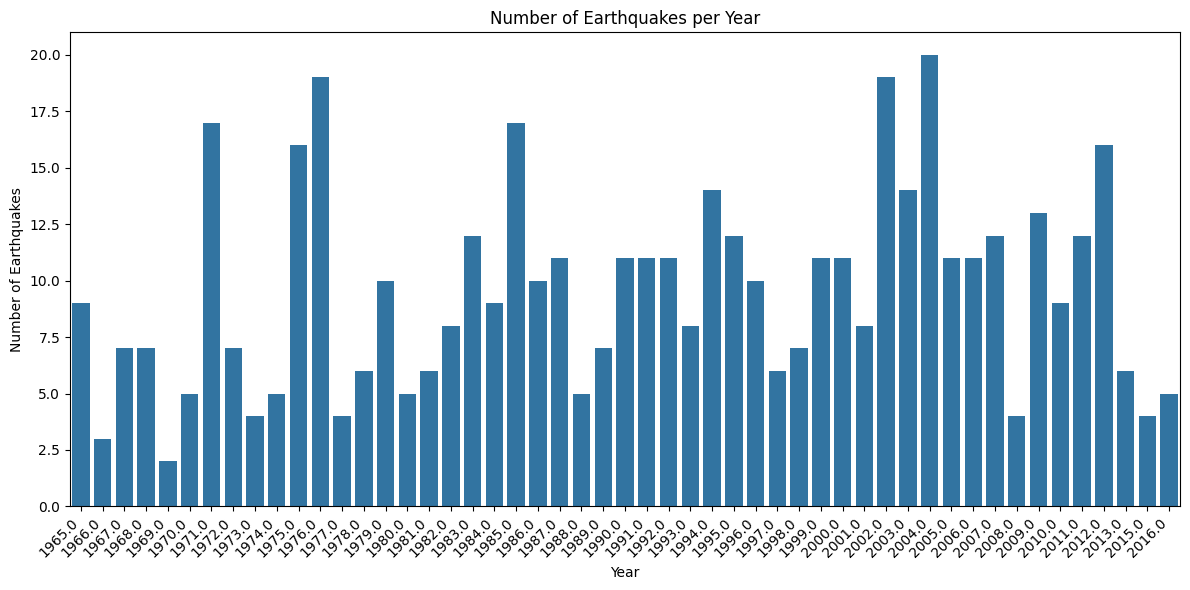

In [108]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=indonesia)  # Removed order parameter
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [109]:
import plotly.express as px

# Assuming your DataFrame is named 'merged_df' and has a 'year' column
fig = px.histogram(indonesia, x='year', title='Number of Earthquakes per Year')
fig.update_layout(xaxis_title='Year', yaxis_title='Number of Earthquakes', bargap=0.2)  # Customize layout
fig.show()

In [111]:
import plotly.express as px

# Filter data for the last 5 years
recent_years = indonesia[indonesia['year'] >= indonesia['year'].max() - 4]

# Create the line graph
fig = px.line(recent_years,
              x='month',
              y='Magnitude',
              color='year',  # Color lines by year
              title='Earthquake Magnitude Trend for the Last 5 Years')

# Customize the layout (optional)
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Magnitude'
)

# Show the plot
fig.show()

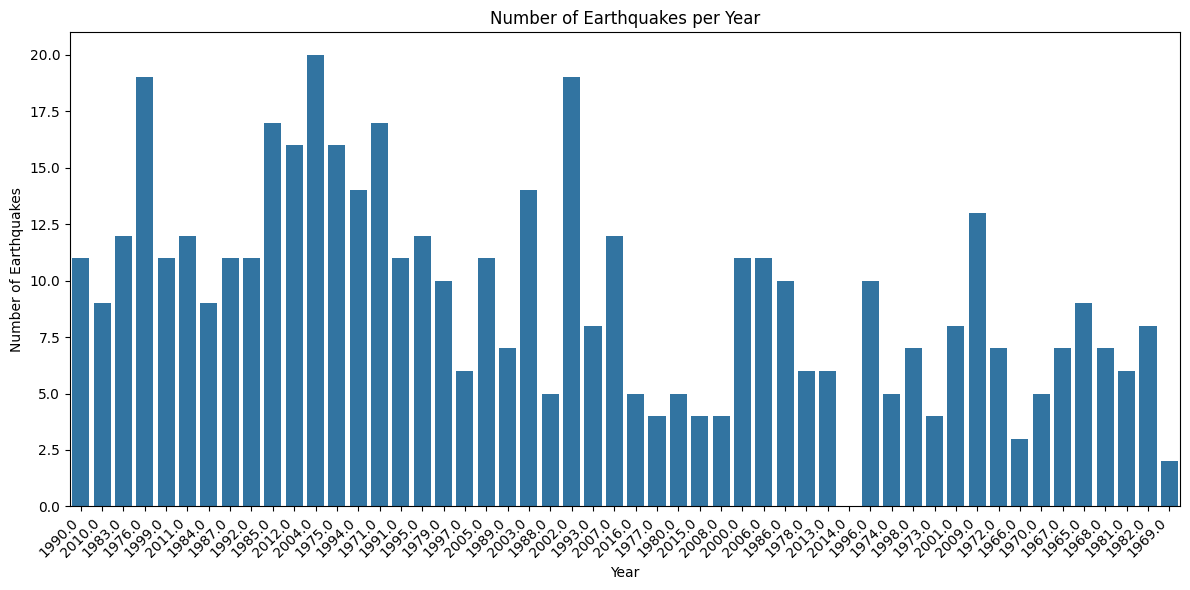

In [106]:
#Countplot to show which year did most earthquakes
# Assuming your DataFrame is named 'merged_df' and has a 'year' column
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.countplot(x='year', data=indonesia, order=merged_df['year'].value_counts().index)
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [90]:
#Line graph to show trend of earthquakes over the years
fig = px.line(indonesia, x='year', y='Magnitude', title='Yearly Trend of Earthquake Magnitudes')
fig.show()

In [86]:
#Goruping countries by magnitude
country_magnitude = merged_df.groupby('Country')['Magnitude'].mean().reset_index()
country_magnitude.head()

Country  Magnitude
0  Afghanistan   5.962963
1      Albania   5.625000
2      Algeria   5.940000
3   Antarctica   5.600000
4    Argentina   5.878017

### Line Graph
To show the average trend of earthquakes over the years worldwide

In [70]:
import plotly.express as px
import pandas as pd


# Group data by year and calculate the average magnitude for each year
yearly_magnitude = merged_df.groupby('year')['Magnitude'].mean().reset_index()

# Create the line graph
fig = px.line(yearly_magnitude, x='year', y='Magnitude', title='Yearly Trend of Earthquake Magnitudes')
fig.show()

Averagely,  we can see that over the years we can see that the magnitude has been reducing

In [72]:
merged_df.head()

Date      Time  Latitude  Longitude        Type  Depth  Magnitude  \
6  1965-01-12  13:32:25    27.357     87.867  Earthquake   20.0        5.9   
10 1965-01-17  20:57:41    -6.807    108.988  Earthquake  227.9        5.9   
14 1965-02-02  15:56:51    37.523     73.251  Earthquake   15.0        6.0   
58 1965-02-18  04:26:37    25.011     94.186  Earthquake   55.0        5.6   
62 1965-02-23  22:11:47   -25.633    -70.679  Earthquake   35.0        7.0   

   Magnitude Type                 geometry     Country    year  month   day  
6              MW    POINT (87.867 27.357)       Nepal  1965.0    1.0  12.0  
10             MW   POINT (108.988 -6.807)   Indonesia  1965.0    1.0  17.0  
14             MW    POINT (73.251 37.523)  Tajikistan  1965.0    2.0   2.0  
58             MW    POINT (94.186 25.011)       India  1965.0    2.0  18.0  
62             MW  POINT (-70.679 -25.633)       Chile  1965.0    2.0  23.0

### Bar Graph to show which earthquakes mostly occur


In [89]:
#Bar graph to show which earthqaukes mostly occur
import plotly.express as px

fig = px.bar(merged_df, x='Type', color='Type', title='Types of Earthquakes')
fig.show()


In [91]:
#Countplot to show which country experiences the most earthquakes
country = merged_df['Country'].value_counts()
country.head(30)

Country
Indonesia                   487
Papua New Guinea            457
Chile                       400
China                       358
United States of America    245
Peru                        239
Argentina                   232
Japan                       196
Mexico                      191
Philippines                 173
Iran                        162
Afghanistan                 162
Russia                      158
Kazakhstan                  107
Turkey                       97
Myanmar                      83
New Zealand                  83
Pakistan                     82
Ecuador                      67
Colombia                     62
Bolivia                      61
Guatemala                    49
India                        42
Taiwan                       41
Greece                       41
Costa Rica                   36
Solomon Islands              35
Italy                        34
Tajikistan                   33
Vanuatu                      27
Name: count, dtype: int64

In [93]:
country.tail(100)

Country
Indonesia                   487
Papua New Guinea            457
Chile                       400
China                       358
United States of America    245
                           ... 
Montenegro                    1
Yemen                         1
Poland                        1
Guinea                        1
Vietnam                       1
Name: count, Length: 97, dtype: int64

In [94]:
# Distribution of Magnitude
fig = px.histogram(merged_df, x='Magnitude', nbins=20, title='Distribution of Earthquake Magnitudes')
fig.show()